In [21]:
import os
os.environ["OMP_NUM_THREADS"] = "1" 

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\Wine_clust.csv").dropna()
X = StandardScaler().fit_transform(df)

In [27]:
# K-Means Clustering
wcss, silhouette_kmeans = [], []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_kmeans.append(silhouette_score(X, kmeans.labels_))

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

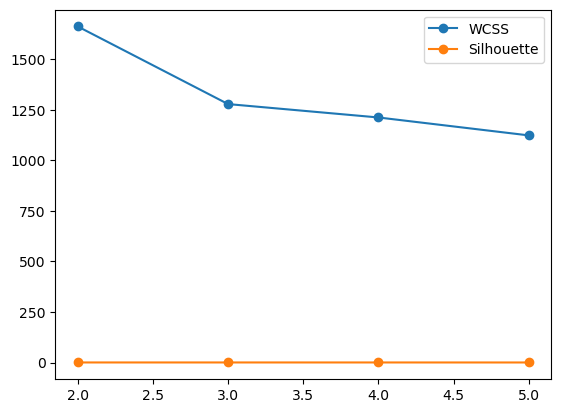

In [31]:

# Elbow and silhouette for K-Means
plt.plot(range(2, 6), wcss, 'o-', label='WCSS')
plt.plot(range(2, 6), silhouette_kmeans, 'o-', label='Silhouette')
plt.legend(); plt.show()

In [33]:
df['KMeans'] = KMeans(n_clusters=3, random_state=42).fit_predict(X)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


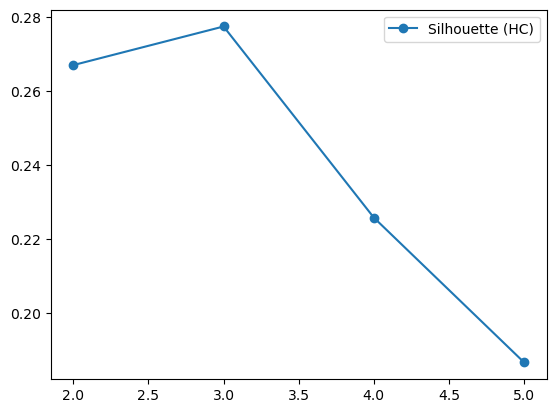

In [35]:
# Hierarchical Clustering
silhouette_hc = [silhouette_score(X, AgglomerativeClustering(n_clusters=k).fit_predict(X)) for k in range(2, 6)]
plt.plot(range(2, 6), silhouette_hc, 'o-', label='Silhouette (HC)')
plt.legend(); plt.show()

In [37]:
df['Hierarchical'] = AgglomerativeClustering(n_clusters=3).fit_predict(X)

In [39]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=1, min_samples=5).fit(X)
df['DBSCAN'] = dbscan.labels_

In [41]:
print(df[['KMeans', 'Hierarchical', 'DBSCAN']].head())

   KMeans  Hierarchical  DBSCAN
0       2             2      -1
1       2             2      -1
2       2             2      -1
3       2             2      -1
4       2             2      -1
